# Problem statement

Education company named X Education sells online courses to industry professionals.On any given day, many professionals who are interested in the courses land on their website and browse for courses.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.
So we have to find the leads that are most likely to convert into paying customers. The company requires to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.



## Importing Necessary Libraries

In [1052]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

## Data Loading

In [1053]:
df=pd.read_csv("Leads.csv")

In [1054]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1055]:
df["Converted"].unique()

array([0, 1], dtype=int64)

In [1056]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Many of the categorical variables have a level called 'Select' which needs to be handled.So replacing "Select" with "Nan"

In [1057]:
df=df.replace("Select",np.nan)

In [1058]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


## Missing value

In [1059]:
100*df.isnull().mean()

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

### Dropping column that having null value above 40 percentage

In [1060]:
df=df.drop(["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)

In [1061]:
100*df.isnull().mean()

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

### Imputing Missing value with Mode and Median

In [1062]:
df["What matters most to you in choosing a course"].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [1063]:
mode=df["Country"].mode()[0]

In [1064]:
df["Country"]=df["Country"].fillna(mode)

In [1065]:
mode1=df["Specialization"].mode()[0]
df["Specialization"]=df["Specialization"].fillna(mode1)

In [1066]:
mode2=df["What is your current occupation"].mode()[0]
df["What is your current occupation"]=df["What is your current occupation"].fillna(mode2)

In [1067]:
mode3=df["What matters most to you in choosing a course"].mode()[0]
df["What matters most to you in choosing a course"]=df["What matters most to you in choosing a course"].fillna(mode3)

In [1068]:
mode4=df["Tags"].mode()[0]
df["Tags"]=df["Tags"].fillna(mode4)

In [1069]:
mode5=df["City"].mode()[0]
df["City"]=df["City"].fillna(mode5)

In [1070]:
mode6=df["Lead Source"].mode()[0]
df["Lead Source"]=df["Lead Source"].fillna(mode6)

In [1071]:
med1=df["TotalVisits"].median()
df["TotalVisits"]=df["TotalVisits"].fillna(med1)

In [1072]:
med2=df["Page Views Per Visit"].median()
df["Page Views Per Visit"]=df["Page Views Per Visit"].fillna(med2)

In [1073]:
mode7=df["Last Activity"].mode()[0]
df["Last Activity"]=df["Last Activity"].fillna(mode7)

In [1074]:
100*df.isnull().mean()

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

In [1075]:
df.shape

(9240, 30)

### Dropping unique valued columns

In [ ]:
#Unique valued column is not making any impact on the target variable.So Dropping them

In [1076]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [1077]:
df=df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

In [1078]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.00,1845,2.67,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.00,238,2.00,...,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.00,199,2.00,...,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.00,499,3.00,...,No,No,No,No,No,No,Will revert after reading the email,Other Metro Cities,No,SMS Sent


In [1079]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00,9240.00
mean,617188.44,0.39,3.44,487.70,2.36
std,23406.00,0.49,4.82,548.02,2.15
min,579533.00,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,12.00,1.00
50%,615479.00,0.00,3.00,248.00,2.00
75%,637387.25,1.00,5.00,936.00,3.00
max,660737.00,1.00,251.00,2272.00,55.00


# EDA

In [1080]:
df.shape

(9240, 25)

In [1081]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [1082]:
id_cols=["Prospect ID","Lead Number"]
cont_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit",]
cat_cols=["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Tags","City","A free copy of Mastering The Interview","Last Notable Activity"]
target=["Converted"]
len(id_cols)+len(cont_cols)+len(cat_cols)

24

### Univariate Analysis

TotalVisits


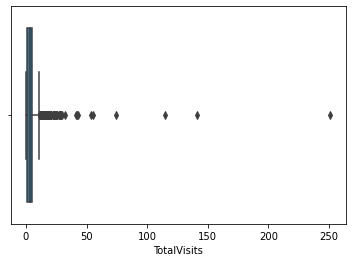

Total Time Spent on Website


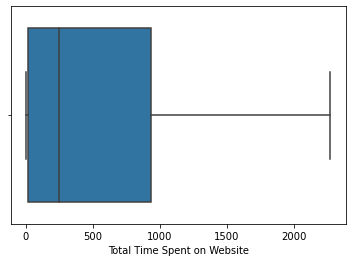

Page Views Per Visit


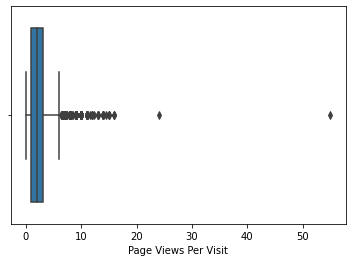

In [1083]:
for i in cont_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

TotalVisits


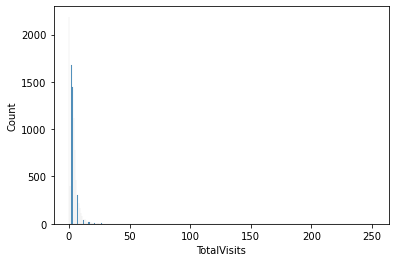

Total Time Spent on Website


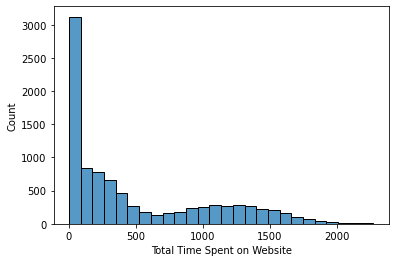

Page Views Per Visit


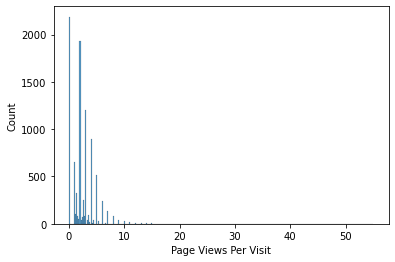

In [1084]:
for i in cont_cols:
    print(i)
    sns.histplot(df[i])
    plt.show()

Lead Origin


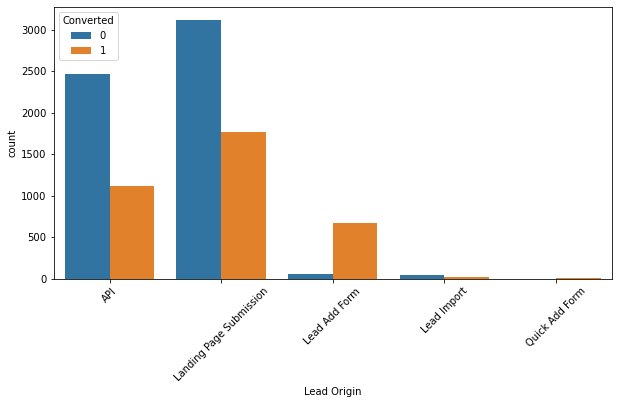

Lead Source


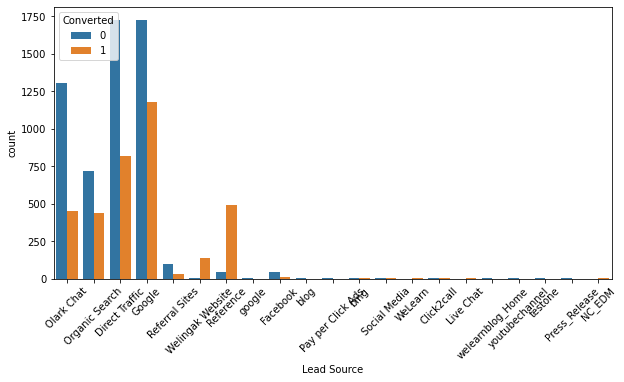

Do Not Email


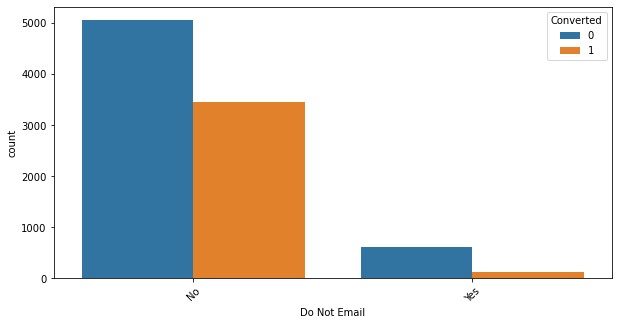

Do Not Call


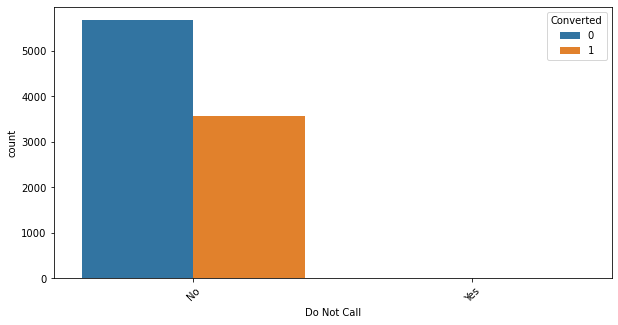

Last Activity


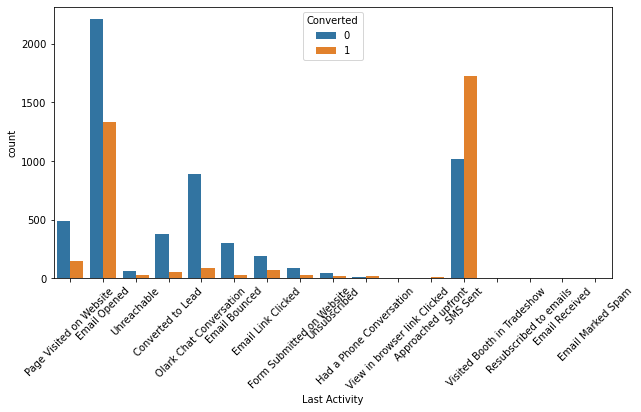

Country


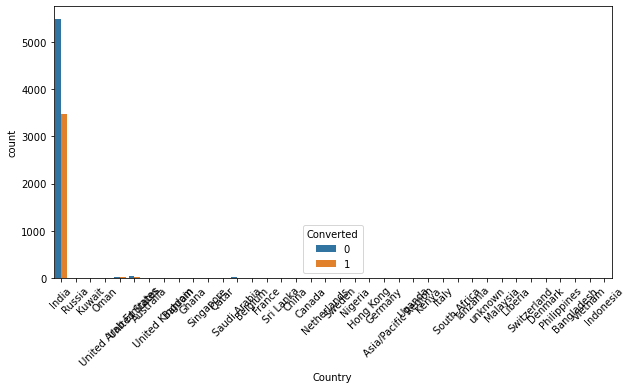

Specialization


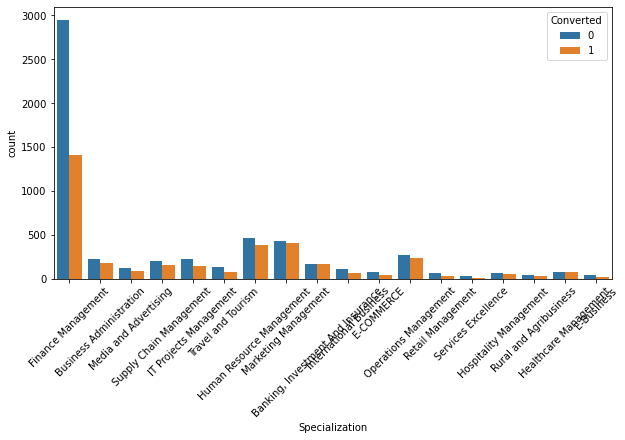

What is your current occupation


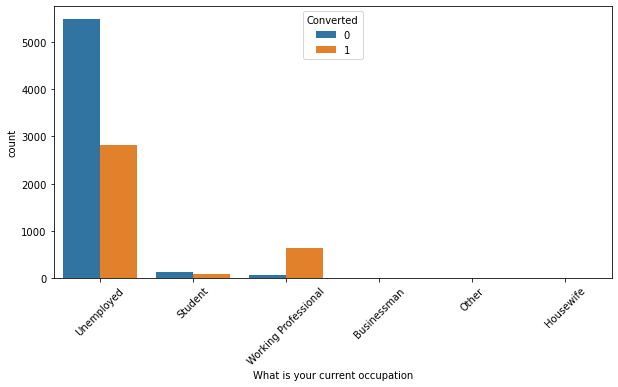

What matters most to you in choosing a course


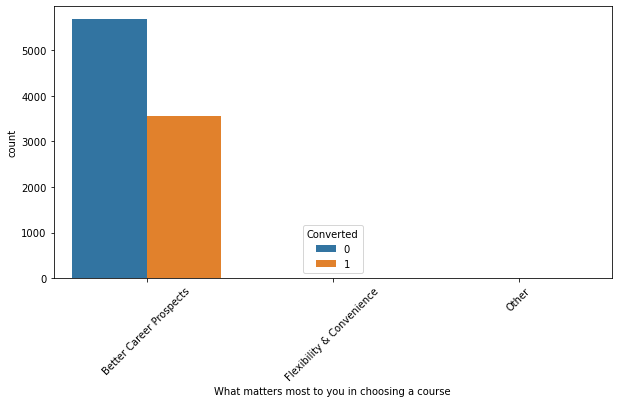

Search


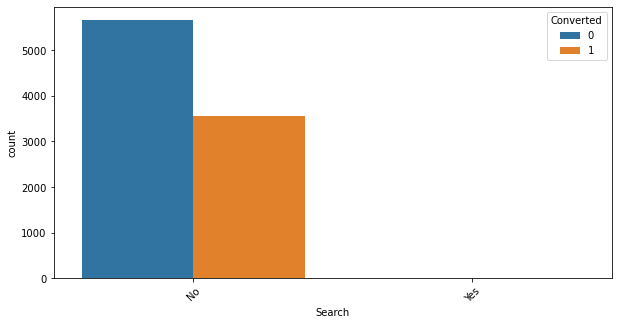

Newspaper Article


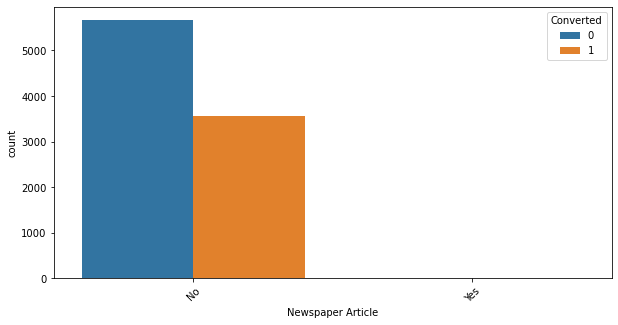

X Education Forums


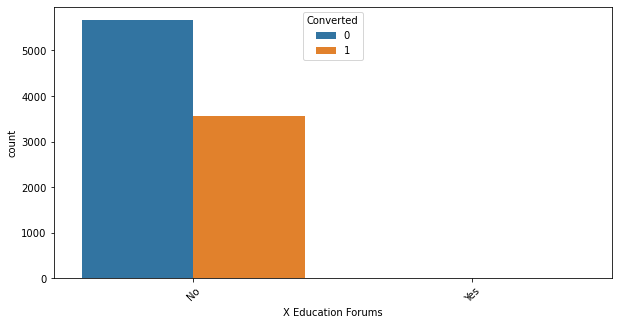

Newspaper


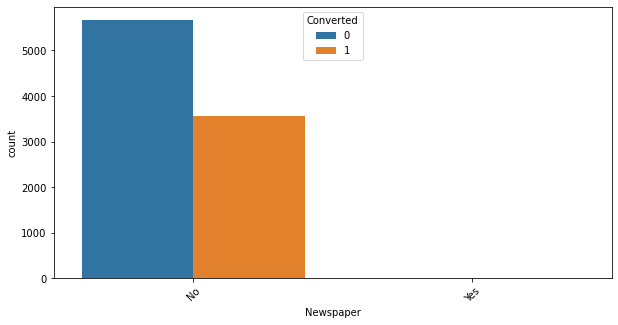

Digital Advertisement


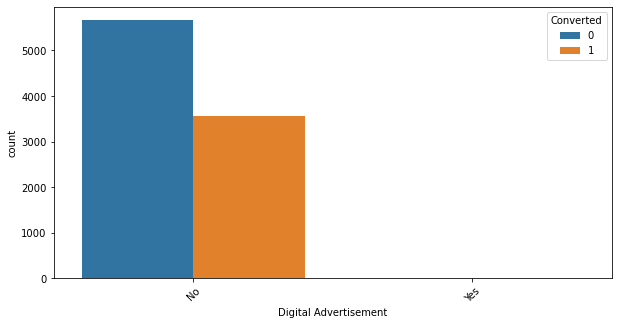

Through Recommendations


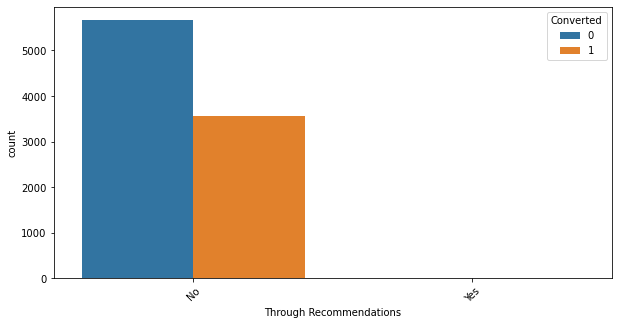

Tags


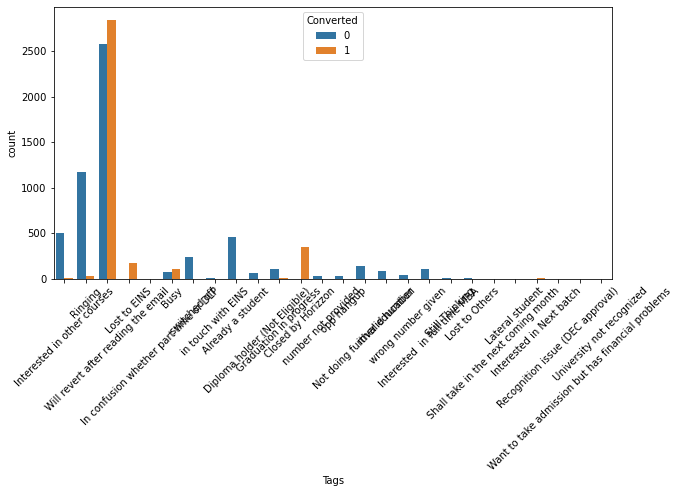

City


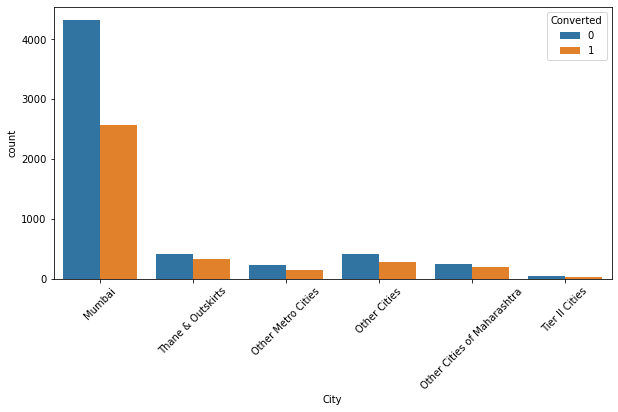

A free copy of Mastering The Interview


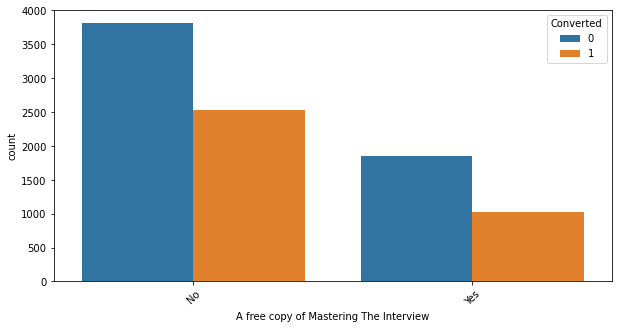

Last Notable Activity


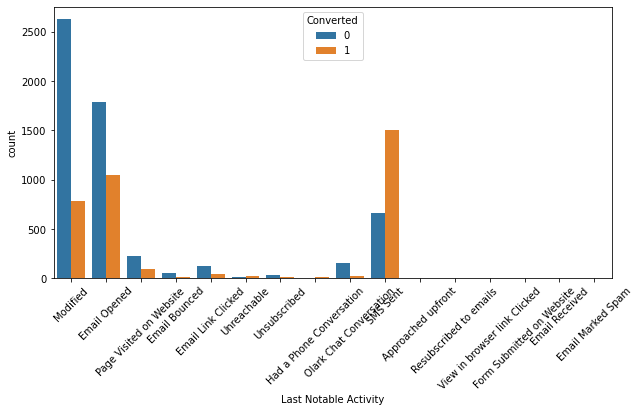

In [1085]:
for i in cat_cols:
    print(i)
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[i], hue = df["Converted"])
    plt.xticks(rotation = 45)
    plt.show()

### Bivariate Analysis

ScatterPlot TotalVisits Vs Total Time Spent on Website


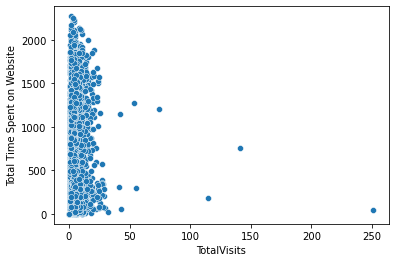

ScatterPlot TotalVisits Vs Page Views Per Visit


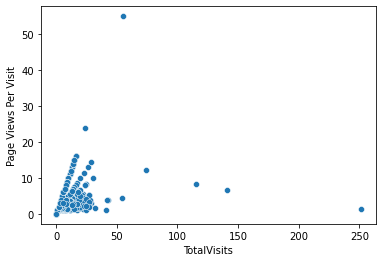

ScatterPlot Total Time Spent on Website Vs TotalVisits


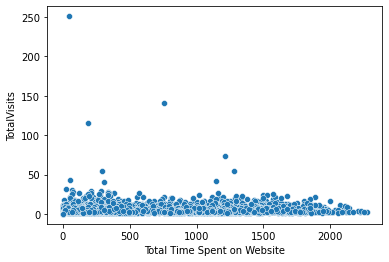

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


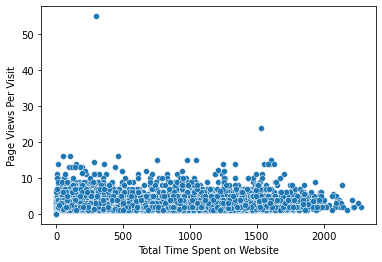

ScatterPlot Page Views Per Visit Vs TotalVisits


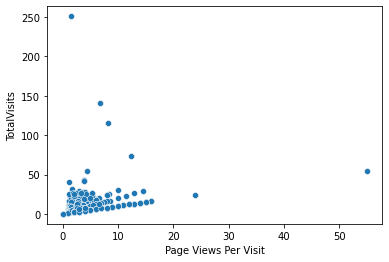

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


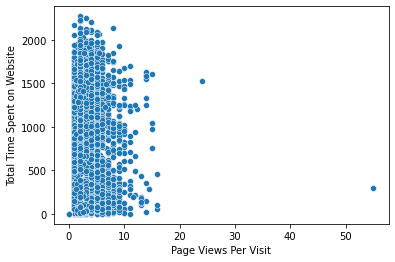

In [1086]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(df[i],df[j])
            plt.show()

BarPlot Converted Vs TotalVisits


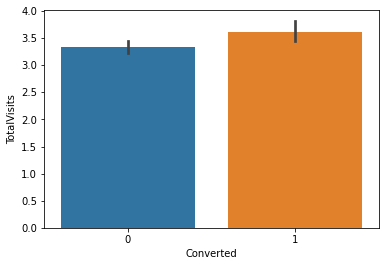

BarPlot Converted Vs Total Time Spent on Website


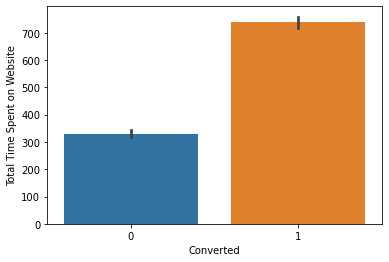

BarPlot Converted Vs Page Views Per Visit


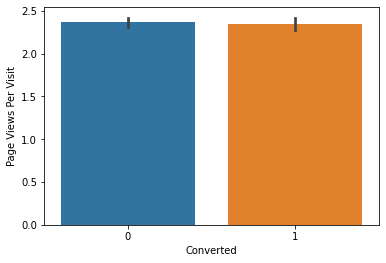

In [1087]:
for i in target:
    for j in cont_cols:
        if i!=j:
            print("BarPlot",i,"Vs",j)
            sns.barplot(df[i],df[j])
            plt.show()

### Multivariate Analysis

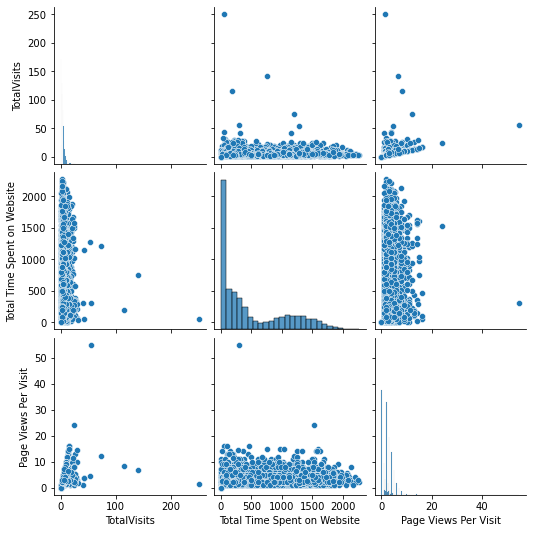

In [1088]:
sns.pairplot(df[cont_cols])

<AxesSubplot:>

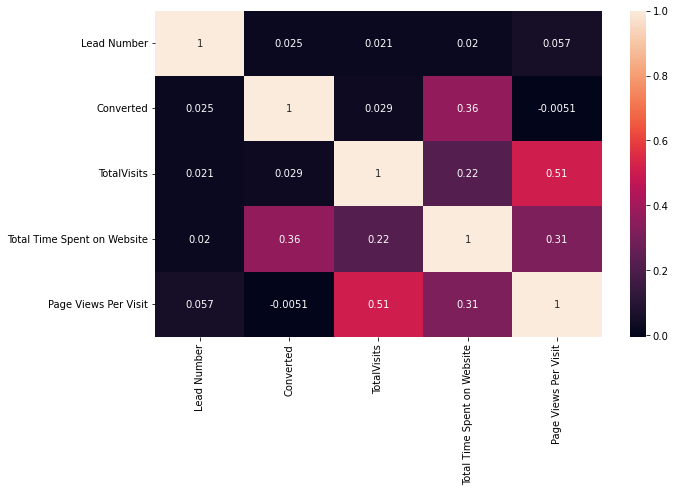

In [1089]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## Conclusions
More people are spent less time on website only.As the amount of time increases count of people decreases
That is major part of people visiting the site are spending less time on the website
Major portion of leeds are from landing page submission and APIs.In that major portion of leads are converted.Lead add form is providing less number of people.but its lead conversion rate is higher
Lead that spent more time on website is having more conversion rate .So this variable is having major effect on leed convertion


## Outlier Treatment

In [1090]:
df["TotalVisits"].describe()

count   9240.00
mean       3.44
std        4.82
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

In [1091]:
df["Page Views Per Visit"].describe()

count   9240.00
mean       2.36
std        2.15
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       55.00
Name: Page Views Per Visit, dtype: float64

#### Removing outliers using 1.5 IQR method

In [1092]:
for var in cont_cols:
    q1=df[var].describe()["25%"]
    q3=df[var].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[var]=np.where(df[var]>upper_bound,upper_bound,df[var])
    df[var]=np.where(df[var]<lower_bound,lower_bound,df[var])
    

TotalVisits


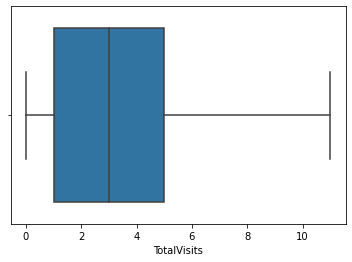

Total Time Spent on Website


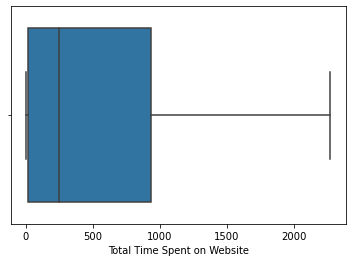

Page Views Per Visit


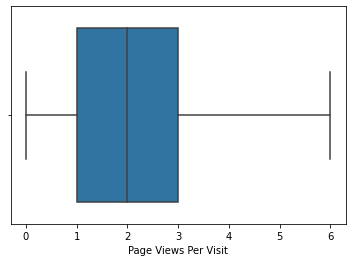

In [1093]:
#Plotting for Outlier
for i in cont_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

#### From the above visualizations and analysis we come to the conclusion that the some of the columns are not relevant from business perspective.so dropping them

In [1094]:
df = df.drop(["Do Not Call","Country","What matters most to you in choosing a course","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"],axis=1)

In [1095]:
df.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                 21
Do Not Email                                 2
Converted                                    2
TotalVisits                                 12
Total Time Spent on Website               1731
Page Views Per Visit                        91
Last Activity                               17
Specialization                              18
What is your current occupation              6
Tags                                        26
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [1096]:
df["Last Activity"].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [1097]:
# These Last Activity the categories are not making significant contributions - 
# 'Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam' 
# So we group them in Other_Activity.

df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                   'Visited Booth in Tradeshow', 'Approached upfront',
                                                   'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                   'Other_Activity')

In [1098]:
# Conversion rate is higher in 'Will revert after reading the email'.

# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [1099]:
# In Last notable Activity column, We can see that these categories have no value at all - 
# 'Approached upfront','Resubscribed to emails', 'View in browser link Clicked','Form Submitted on Website', 'Email Received', 'Email Marked Spam' 

# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails', 
                                                                   'View in browser link Clicked','Form Submitted on Website', 
                                                                   'Email Received', 'Email Marked Spam'], 'Other_Last_Notable_Activity')

In [1100]:
# Lead Source- nan values can be replaced with Null value
df['Lead Source'] = df['Lead Source'].fillna('Null')

# As observed from plot above, many lead sources do not contribute much
# Replacing all other categories having low or no conversion into other platforms.
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM','Null'], 'Other_Platforms')

In [1101]:
df.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 12
Total Time Spent on Website               1731
Page Views Per Visit                        91
Last Activity                               11
Specialization                              18
What is your current occupation              6
Tags                                        13
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                       11
dtype: int64

### Converting some binary variables (Yes/No) to 0/1

In [1102]:
df["Do Not Email"]=df["Do Not Email"].map({"No":0,"Yes":1})
df["A free copy of Mastering The Interview"]=df["A free copy of Mastering The Interview"].map({"No":0,"Yes":1})


In [1103]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.00,0.00,0.00,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.00,674.00,2.50,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.00,1532.00,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.00,305.00,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.00,1428.00,1.00,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [1104]:
df.shape

(9240, 16)

In [1105]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',"Tags",'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df= pd.concat([df, dummy1], axis=1)

In [1106]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.00,0.00,0.00,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.00,674.00,2.50,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.00,1532.00,2.00,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.00,305.00,1.00,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.00,1428.00,1.00,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [1107]:
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(df['What is your current occupation'], prefix='current occupation',drop_first=True)
#Adding the results to the master dataframe
df= pd.concat([df,ml], axis=1)

In [1108]:
df.shape

(9240, 82)

In [1109]:
# We have created dummies for the below variables, so we can drop them
df= df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'],1)

In [1110]:
df.shape

(9240, 74)

In [1111]:
df.set_index('Lead Number', inplace = True)

### Test-Train Split

In [1112]:
X=df.drop(["Converted","Prospect ID"],axis=1)
y=df["Converted"]


In [1113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [1114]:
y_test

Lead Number
619003    1
636884    1
590281    1
579892    0
617929    1
         ..
614623    0
613318    0
650362    1
632342    0
642343    0
Name: Converted, Length: 1848, dtype: int64

In [1115]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)


Train X shape: (7392, 71)
Test X shape: (1848, 71)
Train y shape: (7392,)
Test y shape: (1848,)


## Scaling

In [1116]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [1117]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [1118]:
X_train_scaled

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.18,0.06,0.33,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.18,0.03,0.33,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.36,0.69,0.67,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7388,0.00,0.27,0.31,0.33,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
7389,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7390,0.00,0.18,0.10,0.33,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [1119]:
X_train_scaled.info

<bound method DataFrame.info of       Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0.00         0.00                         0.00   
1             0.00         0.18                         0.06   
2             0.00         0.18                         0.03   
3             0.00         0.36                         0.69   
4             0.00         0.00                         0.00   
...            ...          ...                          ...   
7387          0.00         0.00                         0.00   
7388          0.00         0.27                         0.31   
7389          0.00         0.00                         0.00   
7390          0.00         0.18                         0.10   
7391          0.00         0.00                         0.00   

      Page Views Per Visit  A free copy of Mastering The Interview  \
0                     0.00                                    0.00   
1                     0.33                                 

### Feature Selection

In [1120]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=20)
selector.fit(X_train_scaled,y_train)
selector.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False, False, False, False,  True,  True])

In [1121]:
cols_to_keep=X_train_scaled.columns[selector.support_]

In [1122]:
cols_to_keep

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'current occupation_Unemployed',
       'current occupation_Working Professional'],
      dtype='object')

In [1123]:
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

In [1124]:
X_train.nunique()

Do Not Email                                         2
Total Time Spent on Website                       1635
Lead Origin_Lead Add Form                            2
Lead Source_Welingak Website                         2
Last Activity_Other_Activity                         2
Last Activity_SMS Sent                               2
Tags_Busy                                            2
Tags_Closed by Horizzon                              2
Tags_Lost to EINS                                    2
Tags_Ringing                                         2
Tags_Will revert after reading the email             2
Tags_invalid number                                  2
Tags_switched off                                    2
Tags_wrong number given                              2
Last Notable Activity_Had a Phone Conversation       2
Last Notable Activity_Modified                       2
Last Notable Activity_Olark Chat Conversation        2
Last Notable Activity_SMS Sent                       2
current oc

### First Model

In [1125]:
import statsmodels.api as sm

In [1126]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [1127]:
X_train_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Other_Activity,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,...,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,current occupation_Unemployed,current occupation_Working Professional
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,1.00,0.00,0.06,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
2,1.00,0.00,0.03,0.00,0.00,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
3,1.00,0.00,0.69,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7388,1.00,0.00,0.31,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
7389,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7390,1.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [1128]:
y_train

Lead Number
593802    1
600305    0
589724    1
616844    0
585361    0
         ..
656685    1
659710    1
588165    1
596447    0
606685    0
Name: Converted, Length: 7392, dtype: int64

In [1129]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()
           

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1971.2
Date:                Fri, 09 Jun 2023   Deviance:                       3942.4
Time:                        15:25:53   Pearson chi2:                 1.34e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5495
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.1458      0.321     -9.807      0.000      -3.774      -2.517
Do Not Email                                      -1.2790      0.183     -6.998      0.000      -1.637      -0.921
Total Time Spent on Website                        4.2553      0.177     24.039      0.000       3.908       4.602
Lead Origin_Lead Add Form                          3.0568      0.234     13.068      0.000       2.598       3.515
Lead Source_Welingak Website                       1.5268      0.762      2.003      0.045       0.033       3.021
Last Activity_Other_Activity                       0.6524      0.725      0.900      0.368      -0.768       2.073
Last Activity_SMS Sent                             0.9724      0.166      5.843      0.000       0.646       1.299
Tags_Busy                                          2.5397      0.285      8.923      0.000       1.982       3.098
Tags_Closed by Horizzon                            8.9981      1.032      8.719      0.000       6.975      11.021
Tags_Lost to EINS                                  7.9903      0.631     12.662      0.000       6.754       9.227
Tags_Ringing                                      -1.7393      0.293     -5.938      0.000      -2.313      -1.165
Tags_Will revert after reading the email           3.2350      0.194     16.675      0.000       2.855       3.615
Tags_invalid number                               -2.2482      1.149     -1.957      0.050      -4.500       0.004
Tags_switched off                                 -1.7365      0.558     -3.114      0.002      -2.829      -0.644
Tags_wrong number given                          -21.9730   1.79e+04     -0.001      0.999   -3.51e+04     3.5e+04
Last Notable Activity_Had a Phone Conversation     2.8834      1.495      1.929      0.054      -0.046       5.813
Last Notable Activity_Modified                    -1.3017      0.109    -11.919      0.000      -1.516      -1.088
Last Notable Activity_Olark Chat Conversation     -1.4552      0.331     -4.394      0.000      -2.104      -0.806
Last Notable Activity_SMS Sent                     1.2970      0.202      6.424      0.000       0.901       1.693
current occupation_Unemployed                     -1.3741      0.295     -4.654      0.000      -1.953      -0.795
current occupation_Working Professional            1.3590      0.364      3.736      0.000       0.646       2.072
==================================================================================================================
"""

In [1130]:
X_train_sm=X_train_sm.drop(["Tags_wrong number given"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_wrong number given"],axis=1)

In [1131]:
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1974.3
Date:                Fri, 09 Jun 2023   Deviance:                       3948.5
Time:                        15:25:54   Pearson chi2:                 1.34e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5491
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.2027      0.323     -9.906      0.000      -3.836      -2.569
Do Not Email                                      -1.2855      0.182     -7.052      0.000      -1.643      -0.928
Total Time Spent on Website                        4.2522      0.177     24.036      0.000       3.905       4.599
Lead Origin_Lead Add Form                          3.0635      0.234     13.078      0.000       2.604       3.523
Lead Source_Welingak Website                       1.5207      0.762      1.995      0.046       0.026       3.015
Last Activity_Other_Activity                       0.6443      0.724      0.890      0.373      -0.774       2.063
Last Activity_SMS Sent                             0.9701      0.167      5.825      0.000       0.644       1.297
Tags_Busy                                          2.6350      0.283      9.306      0.000       2.080       3.190
Tags_Closed by Horizzon                            9.0832      1.032      8.802      0.000       7.061      11.106
Tags_Lost to EINS                                  8.0757      0.631     12.800      0.000       6.839       9.312
Tags_Ringing                                      -1.6392      0.291     -5.635      0.000      -2.209      -1.069
Tags_Will revert after reading the email           3.3237      0.193     17.217      0.000       2.945       3.702
Tags_invalid number                               -2.1452      1.148     -1.869      0.062      -4.395       0.105
Tags_switched off                                 -1.6377      0.557     -2.942      0.003      -2.729      -0.547
Last Notable Activity_Had a Phone Conversation     2.9254      1.508      1.940      0.052      -0.030       5.880
Last Notable Activity_Modified                    -1.2994      0.109    -11.885      0.000      -1.514      -1.085
Last Notable Activity_Olark Chat Conversation     -1.4555      0.331     -4.394      0.000      -2.105      -0.806
Last Notable Activity_SMS Sent                     1.2833      0.202      6.365      0.000       0.888       1.678
current occupation_Unemployed                     -1.4040      0.297     -4.722      0.000      -1.987      -0.821
current occupation_Working Professional            1.3443      0.366      3.669      0.000       0.626       2.062
==================================================================================================================
"""

In [1132]:
X_train_sm=X_train_sm.drop(["Tags_invalid number"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_invalid number"],axis=1)

In [1133]:
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1977.1
Date:                Fri, 09 Jun 2023   Deviance:                       3954.1
Time:                        15:25:55   Pearson chi2:                 1.34e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5488
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.2796      0.326    -10.054      0.000      -3.919      -2.640
Do Not Email                                      -1.2835      0.182     -7.046      0.000      -1.641      -0.926
Total Time Spent on Website                        4.2530      0.177     24.034      0.000       3.906       4.600
Lead Origin_Lead Add Form                          3.0725      0.235     13.092      0.000       2.613       3.532
Lead Source_Welingak Website                       1.5121      0.762      1.983      0.047       0.018       3.006
Last Activity_Other_Activity                       0.6385      0.725      0.881      0.378      -0.782       2.059
Last Activity_SMS Sent                             0.9690      0.167      5.812      0.000       0.642       1.296
Tags_Busy                                          2.7607      0.280      9.855      0.000       2.212       3.310
Tags_Closed by Horizzon                            9.1965      1.032      8.915      0.000       7.175      11.218
Tags_Lost to EINS                                  8.1896      0.630     12.992      0.000       6.954       9.425
Tags_Ringing                                      -1.5069      0.287     -5.246      0.000      -2.070      -0.944
Tags_Will revert after reading the email           3.4404      0.190     18.066      0.000       3.067       3.814
Tags_switched off                                 -1.5073      0.555     -2.717      0.007      -2.595      -0.420
Last Notable Activity_Had a Phone Conversation     2.9764      1.527      1.949      0.051      -0.016       5.969
Last Notable Activity_Modified                    -1.2989      0.109    -11.862      0.000      -1.514      -1.084
Last Notable Activity_Olark Chat Conversation     -1.4576      0.331     -4.397      0.000      -2.107      -0.808
Last Notable Activity_SMS Sent                     1.2605      0.201      6.265      0.000       0.866       1.655
current occupation_Unemployed                     -1.4417      0.300     -4.805      0.000      -2.030      -0.854
current occupation_Working Professional            1.3263      0.370      3.586      0.000       0.601       2.051
==================================================================================================================
"""

In [1134]:
X_train_sm=X_train_sm.drop(["Last Notable Activity_Had a Phone Conversation"],axis=1)
X_test_sm=X_test_sm.drop(["Last Notable Activity_Had a Phone Conversation"],axis=1)

In [1135]:
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.4
Date:                Fri, 09 Jun 2023   Deviance:                       3958.8
Time:                        15:25:56   Pearson chi2:                 1.37e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5485
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2621      0.326    -10.021      0.000      -3.900      -2.624
Do Not Email                                     -1.2830      0.182     -7.033      0.000      -1.641      -0.925
Total Time Spent on Website                       4.2390      0.177     23.994      0.000       3.893       4.585
Lead Origin_Lead Add Form                         3.0681      0.235     13.068      0.000       2.608       3.528
Lead Source_Welingak Website                      1.5142      0.762      1.986      0.047       0.020       3.009
Last Activity_Other_Activity                      1.6759      0.608      2.755      0.006       0.484       2.868
Last Activity_SMS Sent                            0.9815      0.167      5.889      0.000       0.655       1.308
Tags_Busy                                         2.7490      0.280      9.827      0.000       2.201       3.297
Tags_Closed by Horizzon                           9.1595      1.031      8.882      0.000       7.138      11.181
Tags_Lost to EINS                                 8.1807      0.630     12.977      0.000       6.945       9.416
Tags_Ringing                                     -1.5156      0.287     -5.283      0.000      -2.078      -0.953
Tags_Will revert after reading the email          3.4283      0.190     18.048      0.000       3.056       3.801
Tags_switched off                                -1.5171      0.554     -2.736      0.006      -2.604      -0.430
Last Notable Activity_Modified                   -1.3158      0.109    -12.027      0.000      -1.530      -1.101
Last Notable Activity_Olark Chat Conversation    -1.4621      0.331     -4.414      0.000      -2.111      -0.813
Last Notable Activity_SMS Sent                    1.2415      0.201      6.178      0.000       0.848       1.635
current occupation_Unemployed                    -1.4388      0.300     -4.801      0.000      -2.026      -0.851
current occupation_Working Professional           1.3160      0.370      3.561      0.000       0.592       2.040
=================================================================================================================
"""

In [1136]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,46.62
1,Do Not Email,1.03
2,Total Time Spent on Website,1.12
3,Lead Origin_Lead Add Form,1.51
4,Lead Source_Welingak Website,1.24
5,Last Activity_Other_Activity,1.01
6,Last Activity_SMS Sent,4.16
7,Tags_Busy,1.13
8,Tags_Closed by Horizzon,1.42
9,Tags_Lost to EINS,1.11


In [1138]:
X_train_sm=X_train_sm.drop(["Last Notable Activity_SMS Sent"],axis=1)
X_test_sm=X_test_sm.drop(["Last Notable Activity_SMS Sent"],axis=1)

In [1139]:
model5=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1999.0
Date:                Fri, 09 Jun 2023   Deviance:                       3997.9
Time:                        15:26:02   Pearson chi2:                 1.36e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5461
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.1116      0.323     -9.630      0.000      -3.745      -2.478
Do Not Email                                     -1.2433      0.182     -6.845      0.000      -1.599      -0.887
Total Time Spent on Website                       4.2184      0.176     23.904      0.000       3.872       4.564
Lead Origin_Lead Add Form                         3.0741      0.236     13.026      0.000       2.612       3.537
Lead Source_Welingak Website                      1.4712      0.762      1.931      0.054      -0.022       2.965
Last Activity_Other_Activity                      1.7686      0.613      2.887      0.004       0.568       2.969
Last Activity_SMS Sent                            1.8450      0.091     20.282      0.000       1.667       2.023
Tags_Busy                                         2.7756      0.275     10.079      0.000       2.236       3.315
Tags_Closed by Horizzon                           9.3101      1.033      9.010      0.000       7.285      11.335
Tags_Lost to EINS                                 8.3256      0.634     13.141      0.000       7.084       9.567
Tags_Ringing                                     -1.3545      0.283     -4.791      0.000      -1.909      -0.800
Tags_Will revert after reading the email          3.3844      0.189     17.935      0.000       3.015       3.754
Tags_switched off                                -1.3799      0.552     -2.499      0.012      -2.462      -0.298
Last Notable Activity_Modified                   -1.7078      0.094    -18.083      0.000      -1.893      -1.523
Last Notable Activity_Olark Chat Conversation    -1.5591      0.331     -4.711      0.000      -2.208      -0.910
current occupation_Unemployed                    -1.4478      0.301     -4.816      0.000      -2.037      -0.859
current occupation_Working Professional           1.3480      0.370      3.640      0.000       0.622       2.074
=================================================================================================================
"""

In [1140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,46.31
1,Do Not Email,1.03
2,Total Time Spent on Website,1.12
3,Lead Origin_Lead Add Form,1.51
4,Lead Source_Welingak Website,1.24
5,Last Activity_Other_Activity,1.01
6,Last Activity_SMS Sent,1.16
7,Tags_Busy,1.13
8,Tags_Closed by Horizzon,1.41
9,Tags_Lost to EINS,1.10


In [1141]:
X_train_sm=X_train_sm.drop(["Lead Source_Welingak Website"],axis=1)
X_test_sm=X_test_sm.drop(["Lead Source_Welingak Website"],axis=1)

In [1142]:
model6=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.6
Date:                Fri, 09 Jun 2023   Deviance:                       4003.2
Time:                        15:26:04   Pearson chi2:                 1.42e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5458
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.1319      0.325     -9.642      0.000      -3.769      -2.495
Do Not Email                                     -1.2481      0.181     -6.887      0.000      -1.603      -0.893
Total Time Spent on Website                       4.2248      0.177     23.912      0.000       3.879       4.571
Lead Origin_Lead Add Form                         3.3050      0.218     15.145      0.000       2.877       3.733
Last Activity_Other_Activity                      1.7648      0.613      2.878      0.004       0.563       2.967
Last Activity_SMS Sent                            1.8458      0.091     20.299      0.000       1.668       2.024
Tags_Busy                                         2.7835      0.276     10.090      0.000       2.243       3.324
Tags_Closed by Horizzon                           9.3147      1.034      9.012      0.000       7.289      11.340
Tags_Lost to EINS                                 8.3368      0.634     13.154      0.000       7.095       9.579
Tags_Ringing                                     -1.3788      0.284     -4.857      0.000      -1.935      -0.822
Tags_Will revert after reading the email          3.3978      0.189     17.946      0.000       3.027       3.769
Tags_switched off                                -1.3692      0.552     -2.478      0.013      -2.452      -0.286
Last Notable Activity_Modified                   -1.7076      0.094    -18.110      0.000      -1.892      -1.523
Last Notable Activity_Olark Chat Conversation    -1.5612      0.331     -4.717      0.000      -2.210      -0.912
current occupation_Unemployed                    -1.4397      0.302     -4.761      0.000      -2.032      -0.847
current occupation_Working Professional           1.3426      0.372      3.609      0.000       0.613       2.072
=================================================================================================================
"""

In [1143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,46.25
1,Do Not Email,1.03
2,Total Time Spent on Website,1.12
3,Lead Origin_Lead Add Form,1.26
4,Last Activity_Other_Activity,1.01
5,Last Activity_SMS Sent,1.15
6,Tags_Busy,1.13
7,Tags_Closed by Horizzon,1.41
8,Tags_Lost to EINS,1.10
9,Tags_Ringing,1.64


In [1144]:
X_train_sm=X_train_sm.drop(["current occupation_Working Professional"],axis=1)
X_test_sm=X_test_sm.drop(["current occupation_Working Professional"],axis=1)

In [1145]:
model7=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.2
Date:                Fri, 09 Jun 2023   Deviance:                       4016.5
Time:                        15:26:05   Pearson chi2:                 1.42e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5450
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.3502      0.228    -10.323      0.000      -2.796      -1.904
Do Not Email                                     -1.2678      0.180     -7.025      0.000      -1.622      -0.914
Total Time Spent on Website                       4.2319      0.176     23.981      0.000       3.886       4.578
Lead Origin_Lead Add Form                         3.3246      0.219     15.157      0.000       2.895       3.754
Last Activity_Other_Activity                      1.8059      0.610      2.960      0.003       0.610       3.002
Last Activity_SMS Sent                            1.8568      0.091     20.423      0.000       1.679       2.035
Tags_Busy                                         2.8821      0.277     10.407      0.000       2.339       3.425
Tags_Closed by Horizzon                           9.4171      1.034      9.110      0.000       7.391      11.443
Tags_Lost to EINS                                 8.4380      0.634     13.303      0.000       7.195       9.681
Tags_Ringing                                     -1.2769      0.284     -4.491      0.000      -1.834      -0.720
Tags_Will revert after reading the email          3.5062      0.190     18.476      0.000       3.134       3.878
Tags_switched off                                -1.2984      0.556     -2.335      0.020      -2.388      -0.209
Last Notable Activity_Modified                   -1.7022      0.094    -18.109      0.000      -1.886      -1.518
Last Notable Activity_Olark Chat Conversation    -1.5658      0.331     -4.729      0.000      -2.215      -0.917
current occupation_Unemployed                    -2.3310      0.178    -13.113      0.000      -2.679      -1.983
=================================================================================================================
"""

In [1146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,17.91
1,Do Not Email,1.03
2,Total Time Spent on Website,1.12
3,Lead Origin_Lead Add Form,1.26
4,Last Activity_Other_Activity,1.01
5,Last Activity_SMS Sent,1.15
6,Tags_Busy,1.13
7,Tags_Closed by Horizzon,1.40
8,Tags_Lost to EINS,1.10
9,Tags_Ringing,1.63


In [1147]:
col1=X_train_sm.columns

In [1148]:
col1

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'current occupation_Unemployed'],
      dtype='object')

### Evaluation

In [1149]:
# Getting the predicted values on the train set
y_train_pred = result7.predict(X_train_sm)
y_train_pred[:10]

0   0.95
1   0.07
2   0.55
3   0.24
4   0.05
5   1.00
6   0.00
7   1.00
8   0.82
9   0.05
dtype: float64

In [1150]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.95408068, 0.071273  , 0.55105945, 0.23862929, 0.05329651,
       0.99838523, 0.00168673, 0.99849094, 0.8194758 , 0.05329651])

#### Creating a dataframe with the actual lead and the predicted probabilities

In [1151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values.flatten(), 'Converted_Prob':y_train_pred.flatten()})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_Prob,Lead Number
0,1,0.95,593802
1,0,0.07,600305
2,1,0.55,589724
3,0,0.24,616844
4,0,0.05,585361


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1152]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.95,593802,1
1,0,0.07,600305,0
2,1,0.55,589724,1
3,0,0.24,616844,0
4,0,0.05,585361,0


In [1153]:
from sklearn import metrics

In [1155]:
# Confusion matrix 
print("For model with arbitrary cut-off 0.5")
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("\nConfusion Matrix:")
print(confusion)

# Let's check the overall accuracy.
print("\nOverall Accuracy:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

For model with arbitrary cut-off 0.5

Confusion Matrix:
[[4263  300]
 [ 451 2378]]

Overall Accuracy: 0.8984036796536796


### Model has 89.84percentage Accuracy

#### Checking VIFs

In [1156]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,17.91
1,Do Not Email,1.03
2,Total Time Spent on Website,1.12
3,Lead Origin_Lead Add Form,1.26
4,Last Activity_Other_Activity,1.01
5,Last Activity_SMS Sent,1.15
6,Tags_Busy,1.13
7,Tags_Closed by Horizzon,1.40
8,Tags_Lost to EINS,1.10
9,Tags_Ringing,1.63


### Metrics beyond simply accuracy

In [1158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8405797101449275

In [1160]:
# Let us calculate specificity
TN / float(TN+FP)

0.9342537804076265

In [1161]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06574621959237344


In [1162]:
# positive predictive value 
print (TP / float(TP+FP))

0.8879761015683346


In [1163]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9043275350021214


#### Step 9: Plotting the ROC Curve

##### An ROC curve demonstrates several things:

##### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

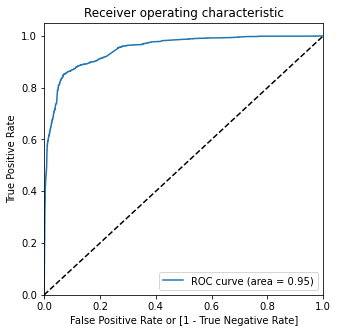

In [1165]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Step 10: Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1166]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.95,593802,1,1,1,1,1,1,1,1,1,1,1
1,0,0.07,600305,0,1,0,0,0,0,0,0,0,0,0
2,1,0.55,589724,1,1,1,1,1,1,1,0,0,0,0
3,0,0.24,616844,0,1,1,1,0,0,0,0,0,0,0
4,0,0.05,585361,0,1,0,0,0,0,0,0,0,0,0


In [1167]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.79   0.97   0.68
0.20  0.20      0.82   0.96   0.73
0.30  0.30      0.86   0.90   0.84
0.40  0.40      0.89   0.86   0.91
0.50  0.50      0.90   0.84   0.93
0.60  0.60      0.89   0.81   0.94
0.70  0.70      0.87   0.72   0.96
0.80  0.80      0.85   0.63   0.98
0.90  0.90      0.81   0.51   0.99


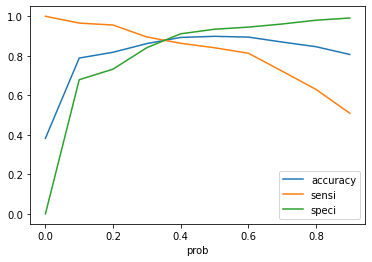

In [1168]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1169]:
# From the above plot we get to know that 0.29 is the optimum point to take it as a cut-off
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.95,593802,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.07,600305,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.55,589724,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.24,616844,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.05,585361,0,1,0,0,0,0,0,0,0,0,0,0


In [1170]:
# Accuracy of model with cut-off 0.2
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8617424242424242


In [1171]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("\nConfusion Matrix:")
print(confusion2)



Confusion Matrix:
[[3838  725]
 [ 297 2532]]


In [1172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8950159066808059

In [1174]:
# Let us calculate specificity
TN / float(TN+FP)

0.8411133026517642

In [1175]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15888669734823582


In [1176]:
# Positive predictive value 
print (TP / float(TP+FP))

0.777402517654283


In [1177]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9281741233373639


### Precision and recall tradeoff

In [1178]:
#Looking at the confusion matrix again

In [1179]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[4263  300]
 [ 451 2378]]


In [1180]:
#Precision
#TP / TP + FP

In [1181]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8879761015683346

In [1182]:
#Using sklearn utilities for the same

In [1183]:
from sklearn.metrics import precision_score, recall_score

In [1184]:
?precision_score

In [1185]:
#Using sklearn to calculate the same

print("Precision:", precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Recall:", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision: 0.8879761015683346
Recall: 0.8405797101449275


#### Precision and recall tradeoff

In [1186]:
from sklearn.metrics import precision_recall_curve

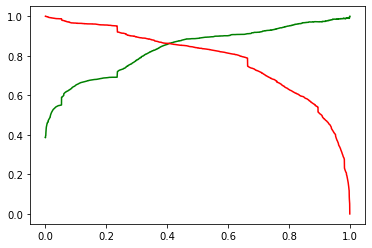

In [1187]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [1188]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Other_Activity,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,current occupation_Unemployed,current occupation_Working Professional
0,0.00,0.44,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
1,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
2,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [1189]:
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Other_Activity,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,current occupation_Unemployed
0,1.00,0.00,0.44,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
4,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,1.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1844,1.00,1.00,0.10,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1845,1.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1846,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00


#### Making predictions on the test set

In [1191]:
y_test_pred = result7.predict(X_test_sm)

In [1192]:
y_test_pred[:10]

0   0.93
1   0.98
2   0.78
3   0.00
4   0.90
5   0.86
6   0.67
7   0.34
8   0.10
9   0.73
dtype: float64

In [1193]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

#Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)
y_pred_1.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1194]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,619003,0.93
1,1,636884,0.98
2,1,590281,0.78
3,0,579892,0.00
4,1,617929,0.90


In [1195]:
# Creating predicted column with 0.2 probability cutoff
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,619003,0.93,1
1,1,636884,0.98,1
2,1,590281,0.78,1
3,0,579892,0.00,0
4,1,617929,0.90,1


In [1196]:
# Overall Accuracy
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print("Accuracy:", accuracy)

confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print("\nConfusion Matrix:")
print(confusion3)

TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("\nSensitivity:", TP / float(TP+FN))

# Let us calculate specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.8869047619047619

Confusion Matrix:
[[1014  102]
 [ 107  625]]

Sensitivity: 0.8538251366120219
Specificity: 0.9086021505376344


### Accuracy:88.69%

### Calculating the lead score

In [1197]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,619003,0.93,1
1,1,636884,0.98,1
2,1,590281,0.78,1
3,0,579892,0.00,0
4,1,617929,0.90,1


In [1198]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.95,593802,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.07,600305,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.55,589724,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.24,616844,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.05,585361,0,1,0,0,0,0,0,0,0,0,0,0


In [1199]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Lead Number','Converted','Converted_Prob','final_predicted']]
leads_train_pred.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,593802,1,0.95,1
1,600305,0,0.07,0
2,589724,1,0.55,1
3,616844,0,0.24,0
4,585361,0,0.05,0


In [1200]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,593802,1,0.95,1
1,600305,0,0.07,0
2,589724,1,0.55,1
3,616844,0,0.24,0
4,585361,0,0.05,0


In [1201]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(7392, 4)
(1848, 4)
(9240, 4)


In [1202]:
# Ensuring the Lead Numbers are unique for each lead in the finl dataframe
len(lead_full_pred['Lead Number'].unique().tolist())

9240

In [1203]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,593802,1,0.95,1,95
1,600305,0,0.07,0,7
2,589724,1,0.55,1,55
3,616844,0,0.24,0,24
4,585361,0,0.05,0,5


In [1204]:
# Making the Lead Number column as index

lead_full_pred = lead_full_pred.set_index('Lead Number').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
Lead Number,,,,
579533,1,0.80,1,80
579538,1,0.83,1,83
579545,0,0.02,0,2
579546,0,0.08,0,8
579564,1,0.94,1,94


In [1205]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = result4.params[1:]
new_params

Do Not Email                                    -1.28
Total Time Spent on Website                      4.24
Lead Origin_Lead Add Form                        3.07
Lead Source_Welingak Website                     1.51
Last Activity_Other_Activity                     1.68
Last Activity_SMS Sent                           0.98
Tags_Busy                                        2.75
Tags_Closed by Horizzon                          9.16
Tags_Lost to EINS                                8.18
Tags_Ringing                                    -1.52
Tags_Will revert after reading the email         3.43
Tags_switched off                               -1.52
Last Notable Activity_Modified                  -1.32
Last Notable Activity_Olark Chat Conversation   -1.46
Last Notable Activity_SMS Sent                   1.24
current occupation_Unemployed                   -1.44
current occupation_Working Professional          1.32
dtype: float64

In [1206]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                    -14.01
Total Time Spent on Website                      46.28
Lead Origin_Lead Add Form                        33.50
Lead Source_Welingak Website                     16.53
Last Activity_Other_Activity                     18.30
Last Activity_SMS Sent                           10.72
Tags_Busy                                        30.01
Tags_Closed by Horizzon                         100.00
Tags_Lost to EINS                                89.31
Tags_Ringing                                    -16.55
Tags_Will revert after reading the email         37.43
Tags_switched off                               -16.56
Last Notable Activity_Modified                  -14.37
Last Notable Activity_Olark Chat Conversation   -15.96
Last Notable Activity_SMS Sent                   13.55
current occupation_Unemployed                   -15.71
current occupation_Working Professional          14.37
dtype: float64

In [1275]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Closed by Horizzon,100.00
8,Tags_Lost to EINS,89.31
1,Total Time Spent on Website,46.28


#### The top three variables that contribute most towards probability of lead getting converted are:

Tags - Closed by Horizzon,  
Tags_Lost to EINS
Total Time Spent on Website


Top 3 variables that need improvement to convert a lead are:

Tags_Will revert after reading the email
Lead Origin_Lead Add Form
Tags_Busy

## Test data

In [1208]:
test=pd.read_csv("test.csv")

In [1209]:
test.head()

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,No,No,3.00,143,5.00,Email Link Clicked,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,No,No,251.00,54,2.00,Page Visited on Website,...,No,Select,Thane & Outskirts,NaN,NaN,NaN,NaN,No,Yes,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,No,No,0.00,0,0.00,SMS Sent,...,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,No,No,16.00,485,2.00,Email Opened,...,No,Lateral Student,Other Cities,NaN,NaN,NaN,NaN,No,No,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,No,No,4.00,1849,7.00,Olark Chat Conversation,...,No,Select,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,Modified


In [1210]:
test.shape

(2007, 36)

#### Many of the categorical variables have a level called 'Select' which needs to be handled.So replacing "Select" with "Nan"

In [1211]:
test=test.replace("Select",np.nan)

In [1212]:
test.head()

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,No,No,3.00,143,5.00,Email Link Clicked,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,No,No,251.00,54,2.00,Page Visited on Website,...,No,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,Yes,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,No,No,0.00,0,0.00,SMS Sent,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,No,No,16.00,485,2.00,Email Opened,...,No,Lateral Student,Other Cities,NaN,NaN,NaN,NaN,No,No,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,No,No,4.00,1849,7.00,Olark Chat Conversation,...,No,NaN,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,Modified


##### Missing value

In [1213]:
100*test.isnull().mean()

Prospect ID                                      0.00
Id                                               0.00
Lead Origin                                      0.00
Lead Source                                      0.60
Do Not Email                                     0.00
Do Not Call                                      0.00
TotalVisits                                      1.20
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.20
Last Activity                                    0.90
Country                                         25.91
Specialization                                  35.08
How did you hear about X Education              80.17
What is your current occupation                 28.60
What matters most to you in choosing a course   28.80
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

### Dropping column that having null value above 40 percentage

In [1214]:
test=test.drop(["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)

In [1215]:
100*test.isnull().mean()

Prospect ID                                      0.00
Id                                               0.00
Lead Origin                                      0.00
Lead Source                                      0.60
Do Not Email                                     0.00
Do Not Call                                      0.00
TotalVisits                                      1.20
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.20
Last Activity                                    0.90
Country                                         25.91
Specialization                                  35.08
What is your current occupation                 28.60
What matters most to you in choosing a course   28.80
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

### Imputing Missing value with Mode

In [1216]:
test["What matters most to you in choosing a course"].unique()

array([nan, 'Better Career Prospects'], dtype=object)

In [1217]:
mode=test["Country"].mode()[0]

In [1218]:
test["Country"]=test["Country"].fillna(mode)

In [1219]:
mode1=test["Specialization"].mode()[0]
test["Specialization"]=test["Specialization"].fillna(mode1)

In [1220]:
mode2=test["What is your current occupation"].mode()[0]
test["What is your current occupation"]=test["What is your current occupation"].fillna(mode2)

In [1221]:
mode3=test["What matters most to you in choosing a course"].mode()[0]
test["What matters most to you in choosing a course"]=test["What matters most to you in choosing a course"].fillna(mode3)

In [1222]:
mode4=test["Tags"].mode()[0]
test["Tags"]=test["Tags"].fillna(mode4)

In [1223]:
mode5=test["City"].mode()[0]
test["City"]=test["City"].fillna(mode5)

In [1224]:
mode6=test["Lead Source"].mode()[0]
test["Lead Source"]=test["Lead Source"].fillna(mode6)

In [1225]:
med1=test["TotalVisits"].median()
test["TotalVisits"]=test["TotalVisits"].fillna(med1)


In [1226]:
med2=test["Page Views Per Visit"].median()
test["Page Views Per Visit"]=test["Page Views Per Visit"].fillna(med2)

In [1227]:
mode7=test["Last Activity"].mode()[0]
test["Last Activity"]=test["Last Activity"].fillna(mode7)

In [1228]:
100*test.isnull().mean()

Prospect ID                                     0.00
Id                                              0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                     

In [1229]:
test.shape

(2007, 29)

### Dropping unique valued columns

In [1230]:
test.nunique()

Prospect ID                                      2007
Id                                               2007
Lead Origin                                         5
Lead Source                                        11
Do Not Email                                        2
Do Not Call                                         2
TotalVisits                                        30
Total Time Spent on Website                       929
Page Views Per Visit                               20
Last Activity                                      15
Country                                            23
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       1
Search                                              2
Magazine                                            1
Newspaper Article                                   1
X Education Forums                                  1
Newspaper                   

In [1231]:
test=test.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

In [1232]:
test

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,No,No,3.00,143,5.00,Email Link Clicked,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,No,No,251.00,54,2.00,Page Visited on Website,...,No,No,No,No,No,No,Interested in other courses,Thane & Outskirts,Yes,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,No,No,0.00,0,0.00,SMS Sent,...,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,No,No,16.00,485,2.00,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Other Cities,No,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,No,No,4.00,1849,7.00,Olark Chat Conversation,...,No,No,No,No,No,No,Interested in other courses,Other Cities of Maharashtra,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,718cc1da-cdba-426b-9f53-4367354afe-2072,113153,Landing Page Submission,Organic Search,Yes,No,7.00,227,6.00,Page Visited on Website,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Modified
2003,718cc1da-cdba-426b-9f53-4367354afe-2073,113154,API,Google,No,No,3.00,382,5.00,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Thane & Outskirts,No,Email Opened
2004,718cc1da-cdba-426b-9f53-4367354afe-2074,113155,API,Google,No,No,2.00,1102,3.00,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
2005,718cc1da-cdba-426b-9f53-4367354afe-2075,113156,API,Olark Chat,No,No,0.00,0,0.00,Olark Chat Conversation,...,No,No,No,No,No,No,opp hangup,Mumbai,No,Modified


In [1233]:
test.describe()

,Id,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2007.00,2007.00,2007.00,2007.00
mean,112154.00,3.60,555.45,3.88
std,579.52,7.23,613.60,3.51
min,111151.00,0.00,0.00,0.00
25%,111652.50,1.00,24.50,2.00
50%,112154.00,3.00,283.00,3.00
75%,112655.50,5.00,1070.00,5.00
max,113157.00,251.00,2505.00,40.00


### Outlier Treatment

In [1234]:
test["TotalVisits"].describe()

count   2007.00
mean       3.60
std        7.23
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

In [1235]:
test["Page Views Per Visit"].describe()

count   2007.00
mean       3.88
std        3.51
min        0.00
25%        2.00
50%        3.00
75%        5.00
max       40.00
Name: Page Views Per Visit, dtype: float64

In [1236]:
for var in cont_cols:
    q1=test[var].describe()["25%"]
    q3=test[var].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    test[var]=np.where(test[var]>upper_bound,upper_bound,test[var])
    test[var]=np.where(test[var]<lower_bound,lower_bound,test[var])
    

TotalVisits


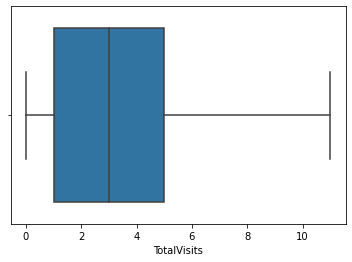

Total Time Spent on Website


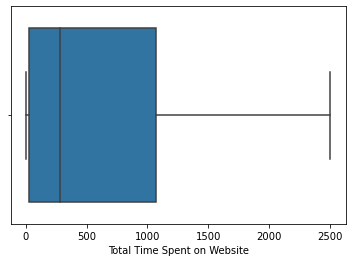

Page Views Per Visit


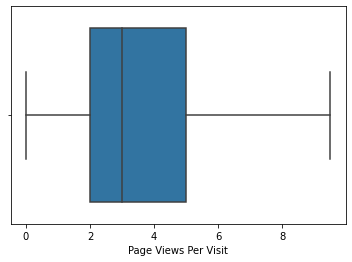

In [1237]:
for i in cont_cols:
    print(i)
    sns.boxplot(test[i])
    plt.show()

In [1238]:
test = test.drop(["Do Not Call","Country","What matters most to you in choosing a course","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"],axis=1)

In [1239]:
# These Last Activity the categories are not making significant contributions - 
# 'Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam' 
# So we group them in Other_Activity.

test['Last Activity'] = test['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                   'Visited Booth in Tradeshow', 'Approached upfront',
                                                   'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                   'Other_Activity')

In [1240]:
# Conversion rate is higher in 'Will revert after reading the email'.

# Let's keep considerable last activities as such and club all others to "Other_Activity"
test['Tags'] = test['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [1241]:
# In Last notable Activity column, We can see that these categories have no value at all - 
# 'Approached upfront','Resubscribed to emails', 'View in browser link Clicked','Form Submitted on Website', 'Email Received', 'Email Marked Spam' 

# Let's keep considerable last activities as such and club all others to "Other_Activity"
test['Last Notable Activity'] = test['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails', 
                                                                   'View in browser link Clicked','Form Submitted on Website', 
                                                                   'Email Received', 'Email Marked Spam'], 'Other_Last_Notable_Activity')

In [1242]:
# Lead Source- nan values can be replaced with Null value
test['Lead Source'] = test['Lead Source'].fillna('Null')

# As observed from plot above, many lead sources do not contribute much
# Replacing all other categories having low or no conversion into other platforms.
test['Lead Source'] = test['Lead Source'].replace(['google'], 'Google')
test['Lead Source'] = test['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM','Null'], 'Other_Platforms')

In [1243]:
test.nunique()

Prospect ID                               2007
Id                                        2007
Lead Origin                                  5
Lead Source                                  9
Do Not Email                                 2
TotalVisits                                 12
Total Time Spent on Website                929
Page Views Per Visit                        10
Last Activity                               11
Specialization                              18
What is your current occupation              6
Tags                                        13
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                       11
dtype: int64

### Converting some binary variables (Yes/No) to 0/1

In [1244]:
test["Do Not Email"]=test["Do Not Email"].map({"No":0,"Yes":1})
test["A free copy of Mastering The Interview"]=test["A free copy of Mastering The Interview"].map({"No":0,"Yes":1})


In [1245]:
test.head()

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,0,3.00,143.00,5.00,Email Link Clicked,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,0,11.00,54.00,2.00,Page Visited on Website,Supply Chain Management,Unemployed,Interested in other courses,Thane & Outskirts,1,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,0,0.00,0.00,0.00,SMS Sent,Finance Management,Unemployed,Interested in other courses,Mumbai,0,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,0,11.00,485.00,2.00,Email Opened,Finance Management,Unemployed,Will revert after reading the email,Other Cities,0,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,0,4.00,1849.00,7.00,Olark Chat Conversation,Finance Management,Unemployed,Interested in other courses,Other Cities of Maharashtra,0,Modified


In [1246]:
test.shape

(2007, 15)

In [1247]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(test[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',"Tags",'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
test= pd.concat([test, dummy1], axis=1)

In [1248]:
test.head()

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,0,3.00,143.00,5.00,Email Link Clicked,Finance Management,...,1,0,0,0,0,0,0,0,0,0
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,0,11.00,54.00,2.00,Page Visited on Website,Supply Chain Management,...,0,0,0,0,0,0,1,0,0,0
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,0,0.00,0.00,0.00,SMS Sent,Finance Management,...,0,0,0,1,0,0,0,0,0,0
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,0,11.00,485.00,2.00,Email Opened,Finance Management,...,0,1,0,0,0,0,0,0,0,0
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,0,4.00,1849.00,7.00,Olark Chat Conversation,Finance Management,...,0,0,0,1,0,0,0,0,0,0


In [1249]:
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(test['What is your current occupation'], prefix='current occupation',drop_first=True)
#Adding the results to the master dataframe
test= pd.concat([test,ml], axis=1)

In [1250]:
# We have created dummies for the below variables, so we can drop them
test= test.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'],1)

In [1251]:
test.shape

(2007, 73)

In [1252]:
test.head()

,Prospect ID,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,0,3.00,143.00,5.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,0,11.00,54.00,2.00,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,0,11.00,485.00,2.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,0,4.00,1849.00,7.00,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Scaling

In [1253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

test.head()

,Prospect ID,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,0,-0.09,-0.67,0.45,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,0,2.67,-0.82,-0.58,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,0,-1.13,-0.91,-1.26,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,0,2.67,-0.11,-0.58,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,0,0.25,2.11,1.14,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1254]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 73 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Prospect ID                                        2007 non-null   object 
 1   Id                                                 2007 non-null   int64  
 2   Do Not Email                                       2007 non-null   int64  
 3   TotalVisits                                        2007 non-null   float64
 4   Total Time Spent on Website                        2007 non-null   float64
 5   Page Views Per Visit                               2007 non-null   float64
 6   A free copy of Mastering The Interview             2007 non-null   int64  
 7   Lead Origin_Landing Page Submission                2007 non-null   uint8  
 8   Lead Origin_Lead Add Form                          2007 non-null   uint8  
 9   Lead Ori

In [1255]:
test.nunique()

Prospect ID                                2007
Id                                         2007
Do Not Email                                  2
TotalVisits                                  12
Total Time Spent on Website                 929
                                           ... 
current occupation_Housewife                  2
current occupation_Other                      2
current occupation_Student                    2
current occupation_Unemployed                 2
current occupation_Working Professional       2
Length: 73, dtype: int64

In [1256]:
test.set_index("Id",inplace=True)

In [1257]:
y_test=y_test.head(2007)

In [1258]:
y_test=y_test.sample(n=2007,random_state=42,replace=True)

In [1259]:
col=col1.drop("const")

In [1260]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'current occupation_Unemployed'],
      dtype='object')

In [ ]:
test[col].shape

In [1261]:
X_test_sm = sm.add_constant(test[col])
y_test_pred =model7.fit().predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Id':test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > 0.345 else 0)
y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
y_test_pred_final.reset_index(inplace=True, drop=True)
print("------------------Result of test")

------------------Result of test


In [1262]:
y_test_pred_final

,Id,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,111151,0,0.02,0,2
1,111152,1,0.00,0,0
2,111153,0,0.00,0,0
3,111154,1,0.16,0,16
4,111155,1,0.93,1,93
...,...,...,...,...,...
2002,113153,0,0.00,0,0
2003,113154,1,0.09,0,9
2004,113155,0,0.71,1,71
2005,113156,0,0.00,0,0


In [1263]:
y_test_pred_final["Convert_predicted"].value_counts()

0    1287
1     720
Name: Convert_predicted, dtype: int64

In [1264]:
test_data=y_test_pred_final[["Id","Convert_predicted"]]


In [1265]:
test_data["Converted"]=y_test_pred_final["Convert_predicted"]

In [1266]:
y_test.shape

(2007,)

In [1267]:
test_data["Converted"].value_counts()

0    1287
1     720
Name: Converted, dtype: int64

In [1268]:
test_data

,Id,Convert_predicted,Converted
0,111151,0,0
1,111152,0,0
2,111153,0,0
3,111154,0,0
4,111155,1,1
...,...,...,...
2002,113153,0,0
2003,113154,0,0
2004,113155,1,1
2005,113156,0,0


In [1269]:
test_data = test_data.drop("Convert_predicted", axis=1)

In [1270]:
test_data

,Id,Converted
0,111151,0
1,111152,0
2,111153,0
3,111154,0
4,111155,1
...,...,...
2002,113153,0
2003,113154,0
2004,113155,1
2005,113156,0


In [1271]:
test_data.to_csv("test_data_submit.csv",index=False)

In [1272]:
test_data.head()

,Id,Converted
0,111151,0
1,111152,0
2,111153,0
3,111154,0
4,111155,1
